In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Genre/fraud/fraudTrain.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Genre/fraud/fraudTrain.csv')
test_dff=pd.read_csv("/content/drive/MyDrive/Genre/fraud/fraudTest.csv")

# Drop unnecessary columns
data.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)
data=data.sample(frac=0.1, random_state=42)
# Convert transaction date to datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract additional features from the datetime
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_day'] = data['trans_date_trans_time'].dt.dayofweek

# Drop the original datetime column
data.drop(columns=['trans_date_trans_time'], inplace=True)

# Check for class imbalance
print(data['is_fraud'].value_counts())

# Define features and target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

# Categorical features
categorical_features = ['merchant', 'category', 'first', 'last', 'gender',
                        'street', 'city', 'state', 'job', 'dob']

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep the rest of the features unchanged
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


is_fraud
0    128895
1       773
Name: count, dtype: int64
[[25778     1]
 [  126    29]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25779
           1       0.97      0.19      0.31       155

    accuracy                           1.00     25934
   macro avg       0.98      0.59      0.66     25934
weighted avg       0.99      1.00      0.99     25934



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Genre/fraud/fraudTrain.csv')
test_dff=pd.read_csv("/content/drive/MyDrive/Genre/fraud/fraudTest.csv")
#data=data.sample(frac=0.05, random_state=42)
#legitimate = data[data['is_fraud'] == 0]
#fraudulent = data[data['is_fraud'] == 1]

# Sample the same number of legitimate transactions as there are fraudulent ones
#n_fraud = len(fraudulent)
#sample_legitimate = legitimate.sample(n=n_fraud, random_state=42)

# Combine the sampled data
#data = pd.concat([sample_legitimate, fraudulent])
# Drop unnecessary columns
def preprocess(data):
  data.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)

# Convert transaction date to datetime
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract additional features from the datetime
  data['trans_hour'] = data['trans_date_trans_time'].dt.hour
  data['trans_day'] = data['trans_date_trans_time'].dt.dayofweek

# Drop the original datetime column
  data.drop(columns=['trans_date_trans_time'], inplace=True)

# Check for class imbalance
  print(data['is_fraud'].value_counts())

# Define features and target
  X = data.drop(columns=['is_fraud'])
  y  = data['is_fraud']
  return X,y

X,y=preprocess(data)
X_t, y_t=preprocess(test_dff)
# Categorical features
categorical_features = ['merchant', 'category', 'first', 'last', 'gender',
                          'street', 'city', 'state', 'job', 'dob']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_test= train_test_split(X, test_size=0.2, random_state=42, stratify=y)
#y_train, y_test= train_test_split(, test_size=0.2, random_state=42, stratify=y)

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep the rest of the features unchanged
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_test= train_test_split(X, test_size=0.2, random_state=42, stratify=y)
#X_train, X_test= train_test_split(X, test_size=0.2, random_state=42, stratify=y)

# Train the model
pipeline.fit(X, y)

# Predictions
y_pred = pipeline.predict(X_t)

# Evaluate the model
print(confusion_matrix(y_t, y_pred))
print(classification_report(y_t, y_pred))


is_fraud
0    1289169
1       7506
Name: count, dtype: int64
is_fraud
0    553574
1      2145
Name: count, dtype: int64
[[553520     54]
 [  1040   1105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.52      0.67      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.76      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
y_pred = pipeline.predict(X_t)

# Evaluate the model
print(confusion_matrix(y_t, y_pred))
print(classification_report(y_t, y_pred))


[[553520     54]
 [  1040   1105]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.52      0.67      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.76      0.83    555719
weighted avg       1.00      1.00      1.00    555719



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay


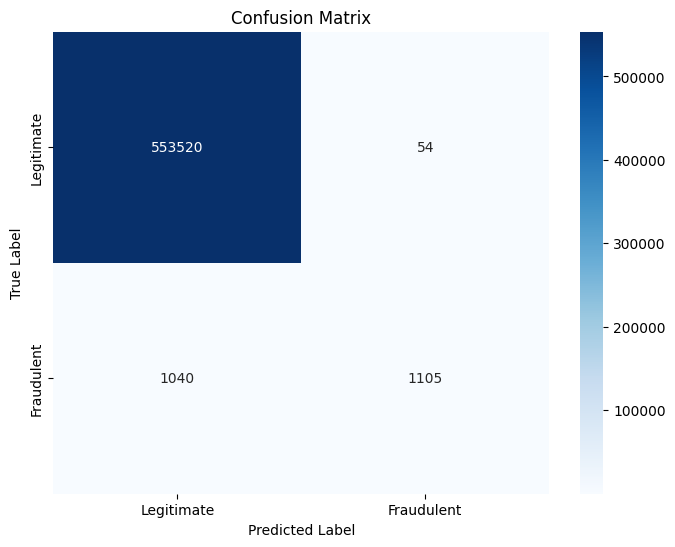

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_t, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
y_test=y_t
X_test=X_t

<Figure size 800x600 with 0 Axes>

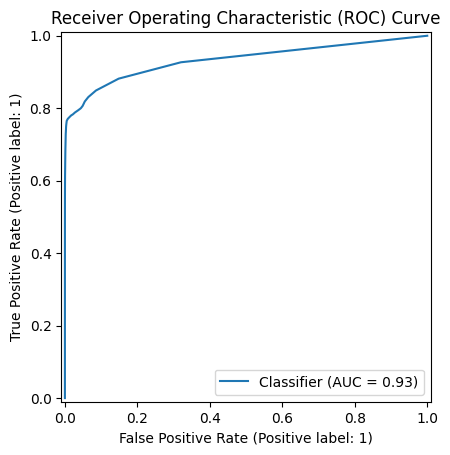

In [ ]:
# Get predicted probabilities
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Plot ROC curve
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(y_test, y_scores)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Optional: Print accuracy
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.4f}')


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.95      0.52      0.67      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.76      0.83    555719
weighted avg       1.00      1.00      1.00    555719

Accuracy: 0.9980


In [ ]:

# Calculate and print accuracy
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9980


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Genre/fraud/fraudTrain.csv')
test_dff=pd.read_csv("/content/drive/MyDrive/Genre/fraud/fraudTest.csv")
#data=data.sample(frac=0.05, random_state=42)
#legitimate = data[data['is_fraud'] == 0]
#fraudulent = data[data['is_fraud'] == 1]

# Sample the same number of legitimate transactions as there are fraudulent ones
#n_fraud = len(fraudulent)
#sample_legitimate = legitimate.sample(n=n_fraud, random_state=42)

# Combine the sampled data
#data = pd.concat([sample_legitimate, fraudulent])
# Drop unnecessary columns
def preprocess(data):
  data.drop(columns=['Unnamed: 0', 'trans_num'], inplace=True)

# Convert transaction date to datetime
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract additional features from the datetime
  data['trans_hour'] = data['trans_date_trans_time'].dt.hour
  data['trans_day'] = data['trans_date_trans_time'].dt.dayofweek

# Drop the original datetime column
  data.drop(columns=['trans_date_trans_time'], inplace=True)

# Check for class imbalance
  print(data['is_fraud'].value_counts())

# Define features and target
  X = data.drop(columns=['is_fraud'])
  y  = data['is_fraud']
  return X,y

X,y=preprocess(data)
X_t, y_t=preprocess(test_dff)
# Categorical features
categorical_features = ['merchant', 'category', 'first', 'last', 'gender',
                          'street', 'city', 'state', 'job', 'dob']

is_fraud
0    1289169
1       7506
Name: count, dtype: int64
is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep the rest of the features unchanged
)

# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_test= train_test_split(X, test_size=0.2, random_state=42, stratify=y)
#X_train, X_test= train_test_split(X, test_size=0.2, random_state=42, stratify=y)

# Train the model
pipeline.fit(X, y)

# Predictions
y_pred = pipeline.predict(X_t)

# Evaluate the model
print(confusion_matrix(y_t, y_pred))
print(classification_report(y_t, y_pred))


[[552535   1039]
 [   616   1529]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.60      0.71      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.86      0.82    555719
weighted avg       1.00      1.00      1.00    555719



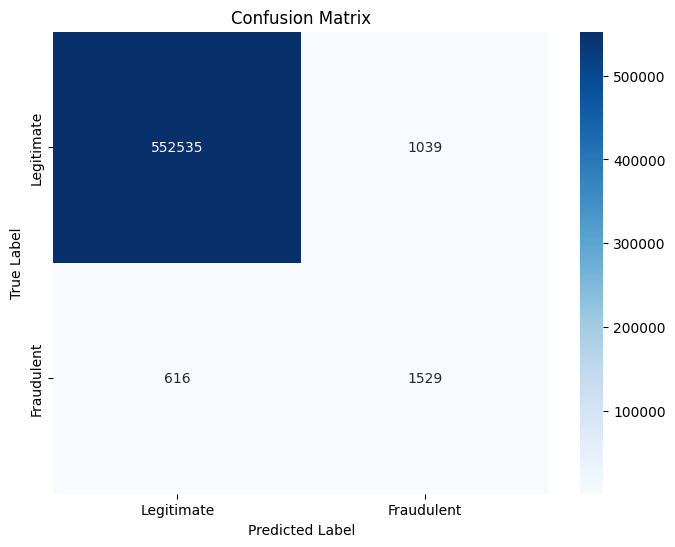

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_t, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:

# Calculate and print accuracy
accuracy = (y_pred == y_test).mean()
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9970


# AUTO-Encoders


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              